In [35]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv("data.csv")

In [37]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
null_values= df.isnull().sum()

In [40]:
print("Column with null values:")
print(null_values[null_values> 0])

Column with null values:
Unnamed: 32    569
dtype: int64


In [41]:
 df_cleaned= df.drop(columns=['id', 'Unnamed: 32'])

In [42]:
x = df_cleaned.drop(columns=['diagnosis'])
print("features")
print(x.head())
y = df['diagnosis'].values

features
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0  

In [43]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.6, random_state=12)

In [44]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [45]:
prediction = svm.predict(x_test)

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.8859649122807017


In [47]:
# Calculate precision
precision = precision_score(y_test, prediction, pos_label='M')
print("Precision: ", precision)

Precision:  0.968421052631579


In [48]:
# Calculate F1 score
f1 = f1_score(y_test, prediction, pos_label='M')
print("F1 Score: ", f1)

F1 Score:  0.8251121076233184


In [49]:
# Calculate sensitivity (recall)
sensitivity = recall_score(y_test, prediction, pos_label='M')
print("Sensitivity: ", sensitivity)

Sensitivity:  0.71875


In [50]:
# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, prediction, labels=['B', 'M']).ravel()
specificity = tn / (tn + fp)
print("Specificity: ", specificity)

Specificity:  0.985981308411215


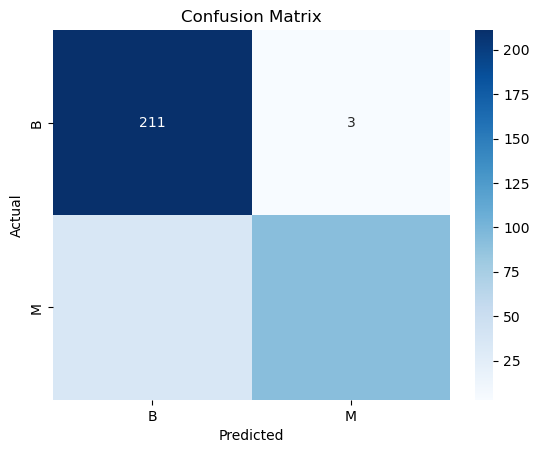

In [51]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()